In [67]:
#from ensemble import RegressionEnsemble, MixedRegressionEnsemble, BootstrapEnsemble, ShuffleEnsemble
import ensemble
import importlib
importlib.reload(ensemble)

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

# Toy dataset
from http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html

In [68]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
forest_regression = ensemble.RegressionEnsemble()
forest_regression.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_forest,std_forest = forest_regression.predict(X_test,std=True)



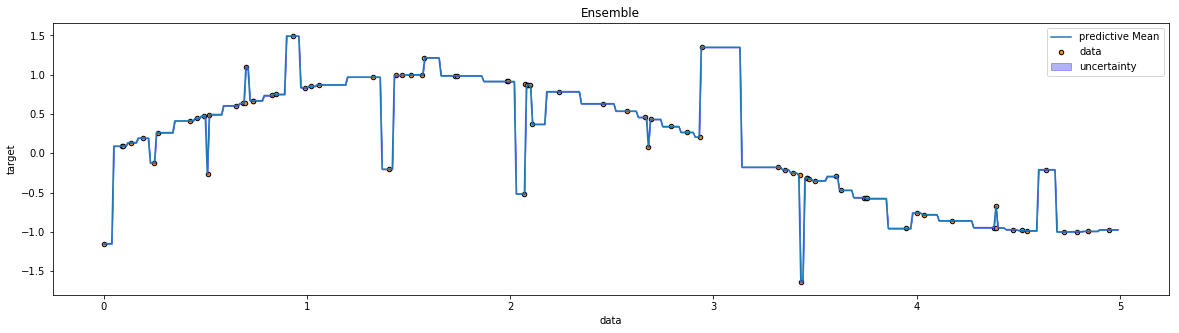

In [69]:
forest_regression.scatterplot(X_test,X=X,y=y)

# Mixed Models

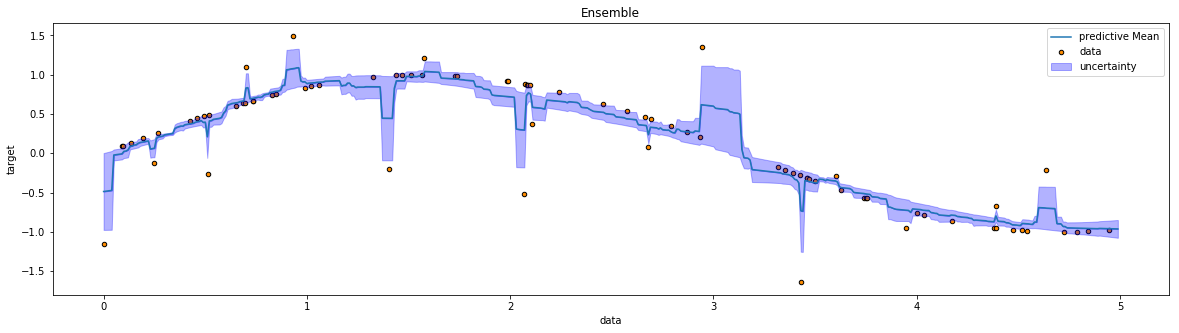

In [70]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR(),
                                                           RandomForestRegressor()])
mixed_regression = mixed_ensemble#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_regression.predict(X_test,std=True)

mixed_ensemble.scatterplot(X_test,X=X,y=y)

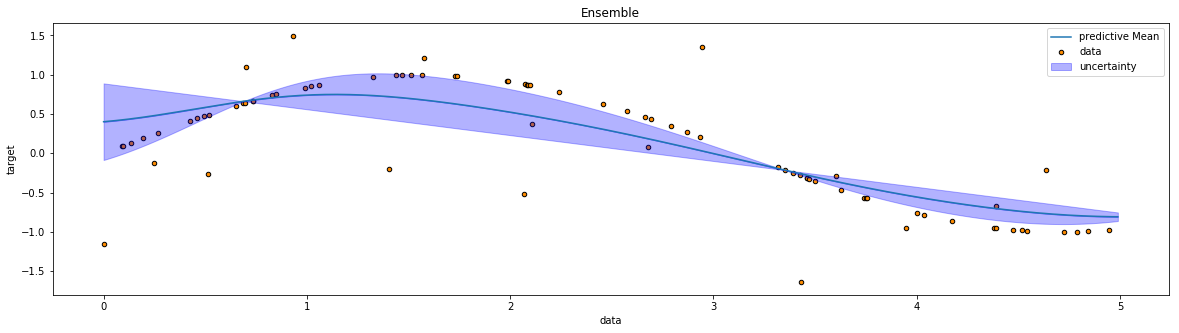

In [71]:
mixed_ensemble_2 = ensemble.MixedRegressionEnsemble(models = [#DecisionTreeRegressor(),
                                                            LinearRegression(),
                                                            #KNeighborsRegressor(),
                                                            #MLPRegressor(max_iter=1000),
                                                           SVR()
                                                             ])
mixed_regression = mixed_ensemble_2#DecisionTreeRegressor(max_depth=5)
mixed_regression.fit(X, y)
y_mixed,std_mixed = mixed_ensemble_2.predict(X_test,std=True)

mixed_ensemble_2.scatterplot(X_test,X=X,y=y)

# Bootstrap

In [72]:
bootstrap_ensemble = ensemble.BootstrapEnsemble()
bootstrap_regression = bootstrap_ensemble#DecisionTreeRegressor(max_depth=5)
bootstrap_regression.fit(X, y)

# Predict
y_bootstrap,std_bootstrap = bootstrap_regression.predict(X_test,std=True)



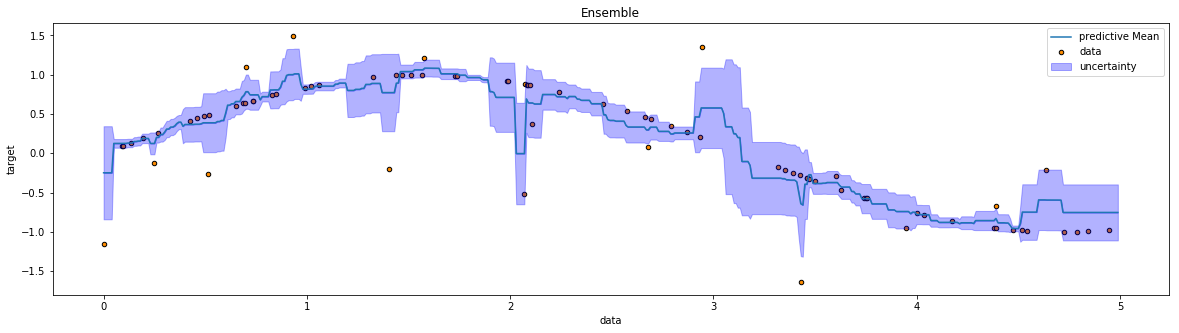

In [73]:
bootstrap_ensemble.scatterplot(X_test,X=X,y=y)

# Different Data shuffling

In [74]:
shuffle_ensemble = ensemble.ShuffleEnsemble(model_type=RandomForestRegressor)

In [75]:
shuffle_regression = shuffle_ensemble#DecisionTreeRegressor(max_depth=5)
shuffle_regression.fit(X, y)

# Predict
y_shuffle,std_shuffle = shuffle_regression.predict(X_test,std=True)



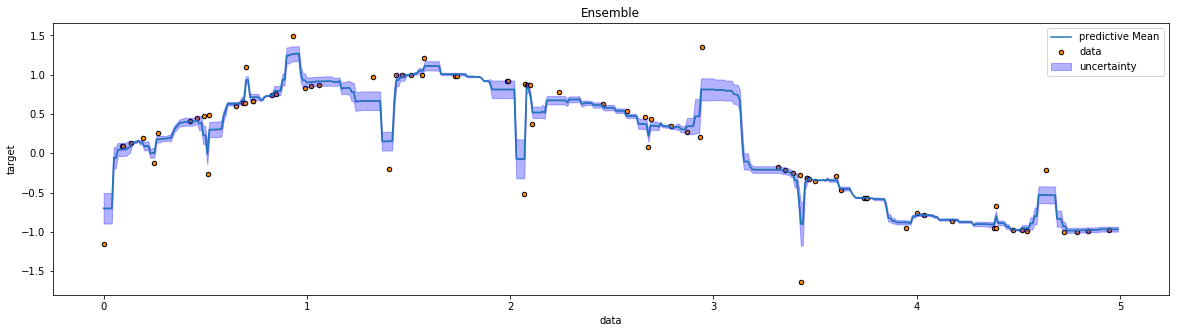

In [76]:
shuffle_ensemble.scatterplot(X_test,X=X,y=y)

# Linear Case

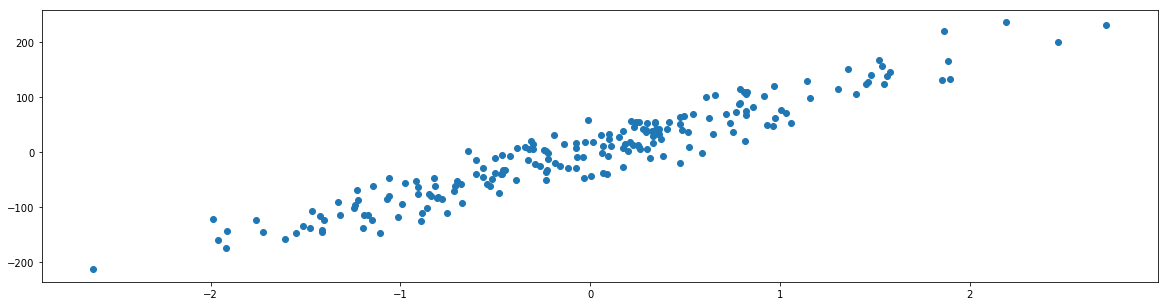

In [77]:
X, y = make_regression(n_samples=200, n_features=1, noise=25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X,y)

## TreeEnsemble

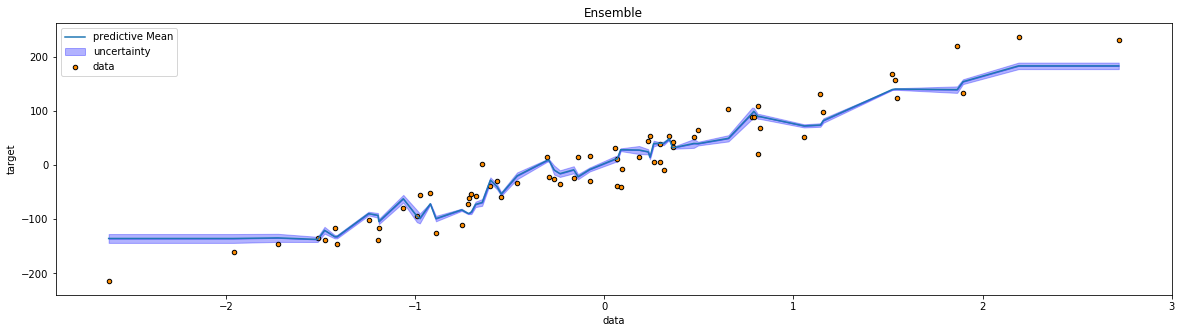

In [78]:
treeEnsemble = ensemble.RegressionEnsemble(10,RandomForestRegressor)
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

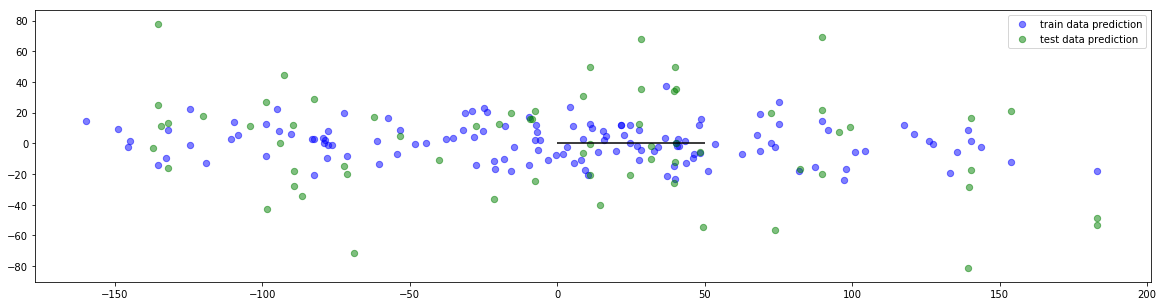

In [79]:
treeEnsemble.plot_residuals(X_train,y_train,X_test,y_test)

In [80]:
treeEnsemble.self_evaluate(X_test,y_test)

{'NLPD': -260.45186265748464,
 'correlation between error and variance': 0.11195043709809054,
 'coverage probability': 0.09090909090909091,
 'error normalcy': 40.73660258943474,
 'rsme': 32.427963504860784}

## Mixed Ensemble

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


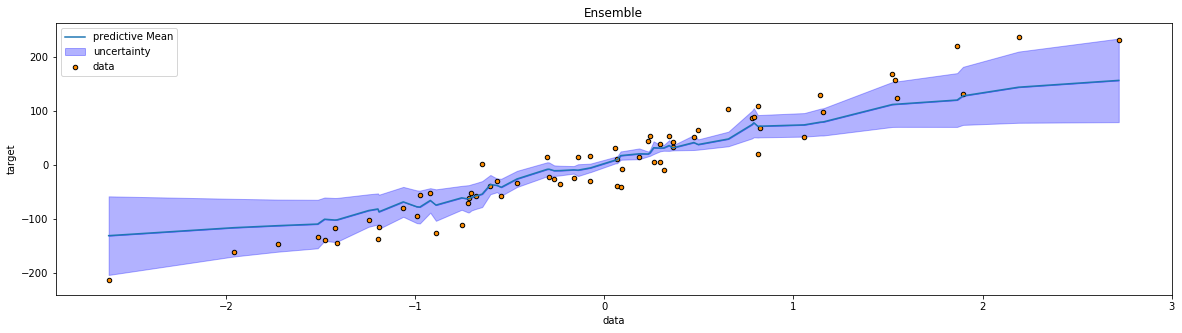

In [81]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=2000),
                                                           SVR(),
                                                           #RandomForestRegressor()
                                                           ])
mixed_ensemble.fit(X_train,y_train)
y_hat,std  = mixed_ensemble.predict(X_test,std=True)
mixed_ensemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

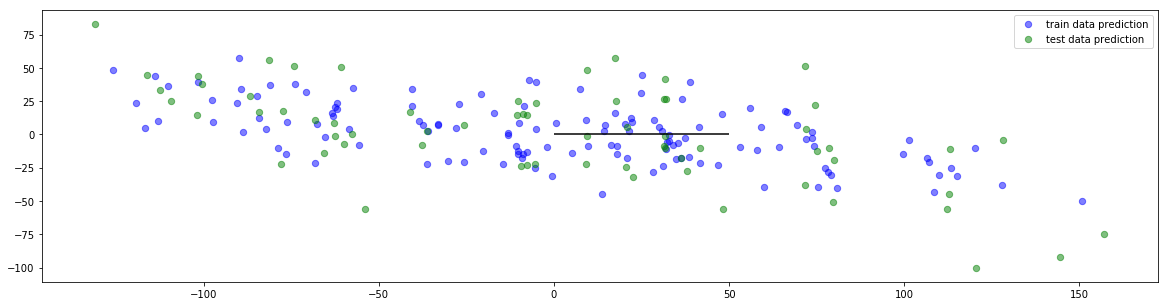

In [82]:
mixed_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [83]:
mixed_ensemble.self_evaluate(X_test,y_test)

{'NLPD': -65.52469904684585,
 'correlation between error and variance': 0.5700056735538203,
 'coverage probability': 0.4393939393939394,
 'error normalcy': 55.71336338905532,
 'rsme': 35.889519528457804}

## Bootstrap


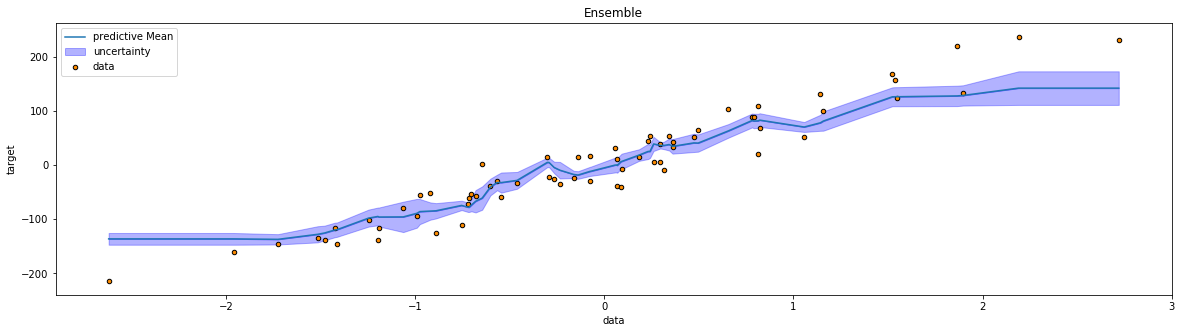

In [84]:
bootstrap_ensemble = ensemble.BootstrapEnsemble(model_type=RandomForestRegressor)


bootstrap_ensemble.fit(X_train,y_train)
y_hat,std  = bootstrap_ensemble.predict(X_test,std=True)
bootstrap_ensemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

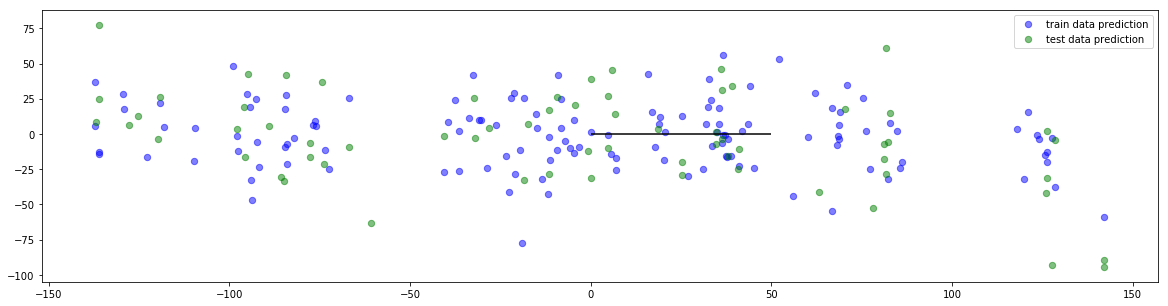

In [85]:
bootstrap_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [86]:
bootstrap_ensemble.self_evaluate(X_test,y_test)

{'NLPD': -77.39963264875283,
 'correlation between error and variance': 0.4266381811351113,
 'coverage probability': 0.36363636363636365,
 'error normalcy': 59.548344715955324,
 'rsme': 33.64399064661172}

## different Data Shuffling

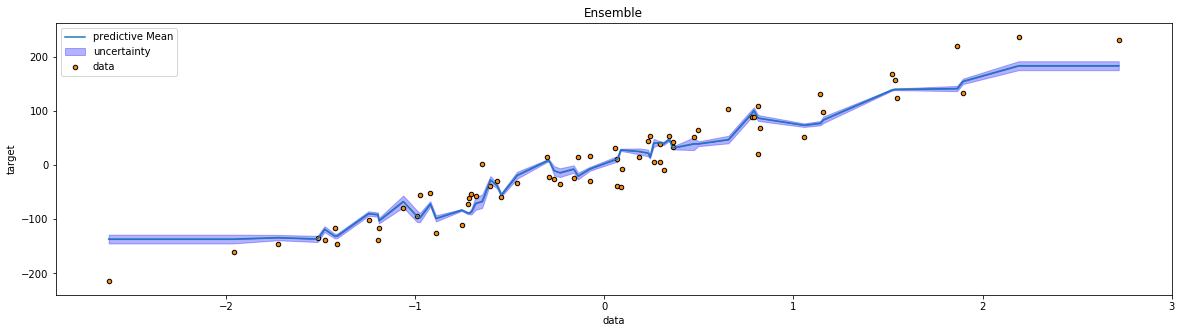

In [87]:
shuffle_ensemble = ensemble.ShuffleEnsemble(100,model_type=RandomForestRegressor)
shuffle_ensemble.fit(X_train,y_train)
y_hat,std  = shuffle_ensemble.predict(X_test,std=True)
shuffle_ensemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

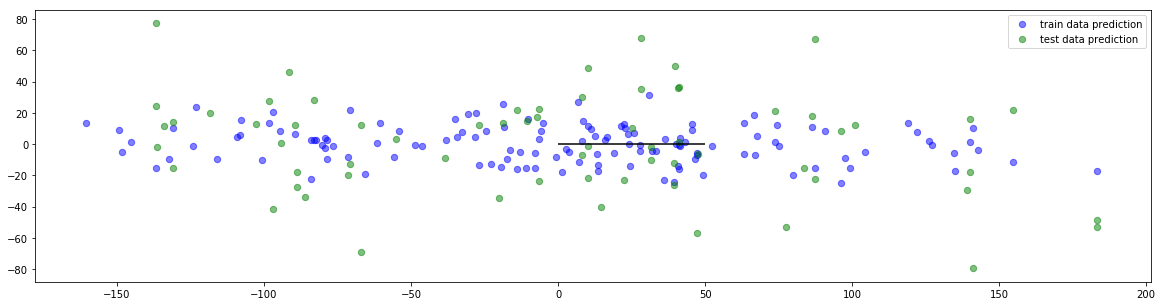

In [88]:
shuffle_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [89]:
shuffle_ensemble.self_evaluate(X_test,y_test)

{'NLPD': -237.6122069802096,
 'correlation between error and variance': 0.12543625909611864,
 'coverage probability': 0.09090909090909091,
 'error normalcy': 39.33086686479161,
 'rsme': 32.10566346045204}

# Boston Housing Prices (Mulitdimensional Dataset)

In [90]:
boston = load_boston()
y = boston.target
X = boston.data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## TreeEnsemble

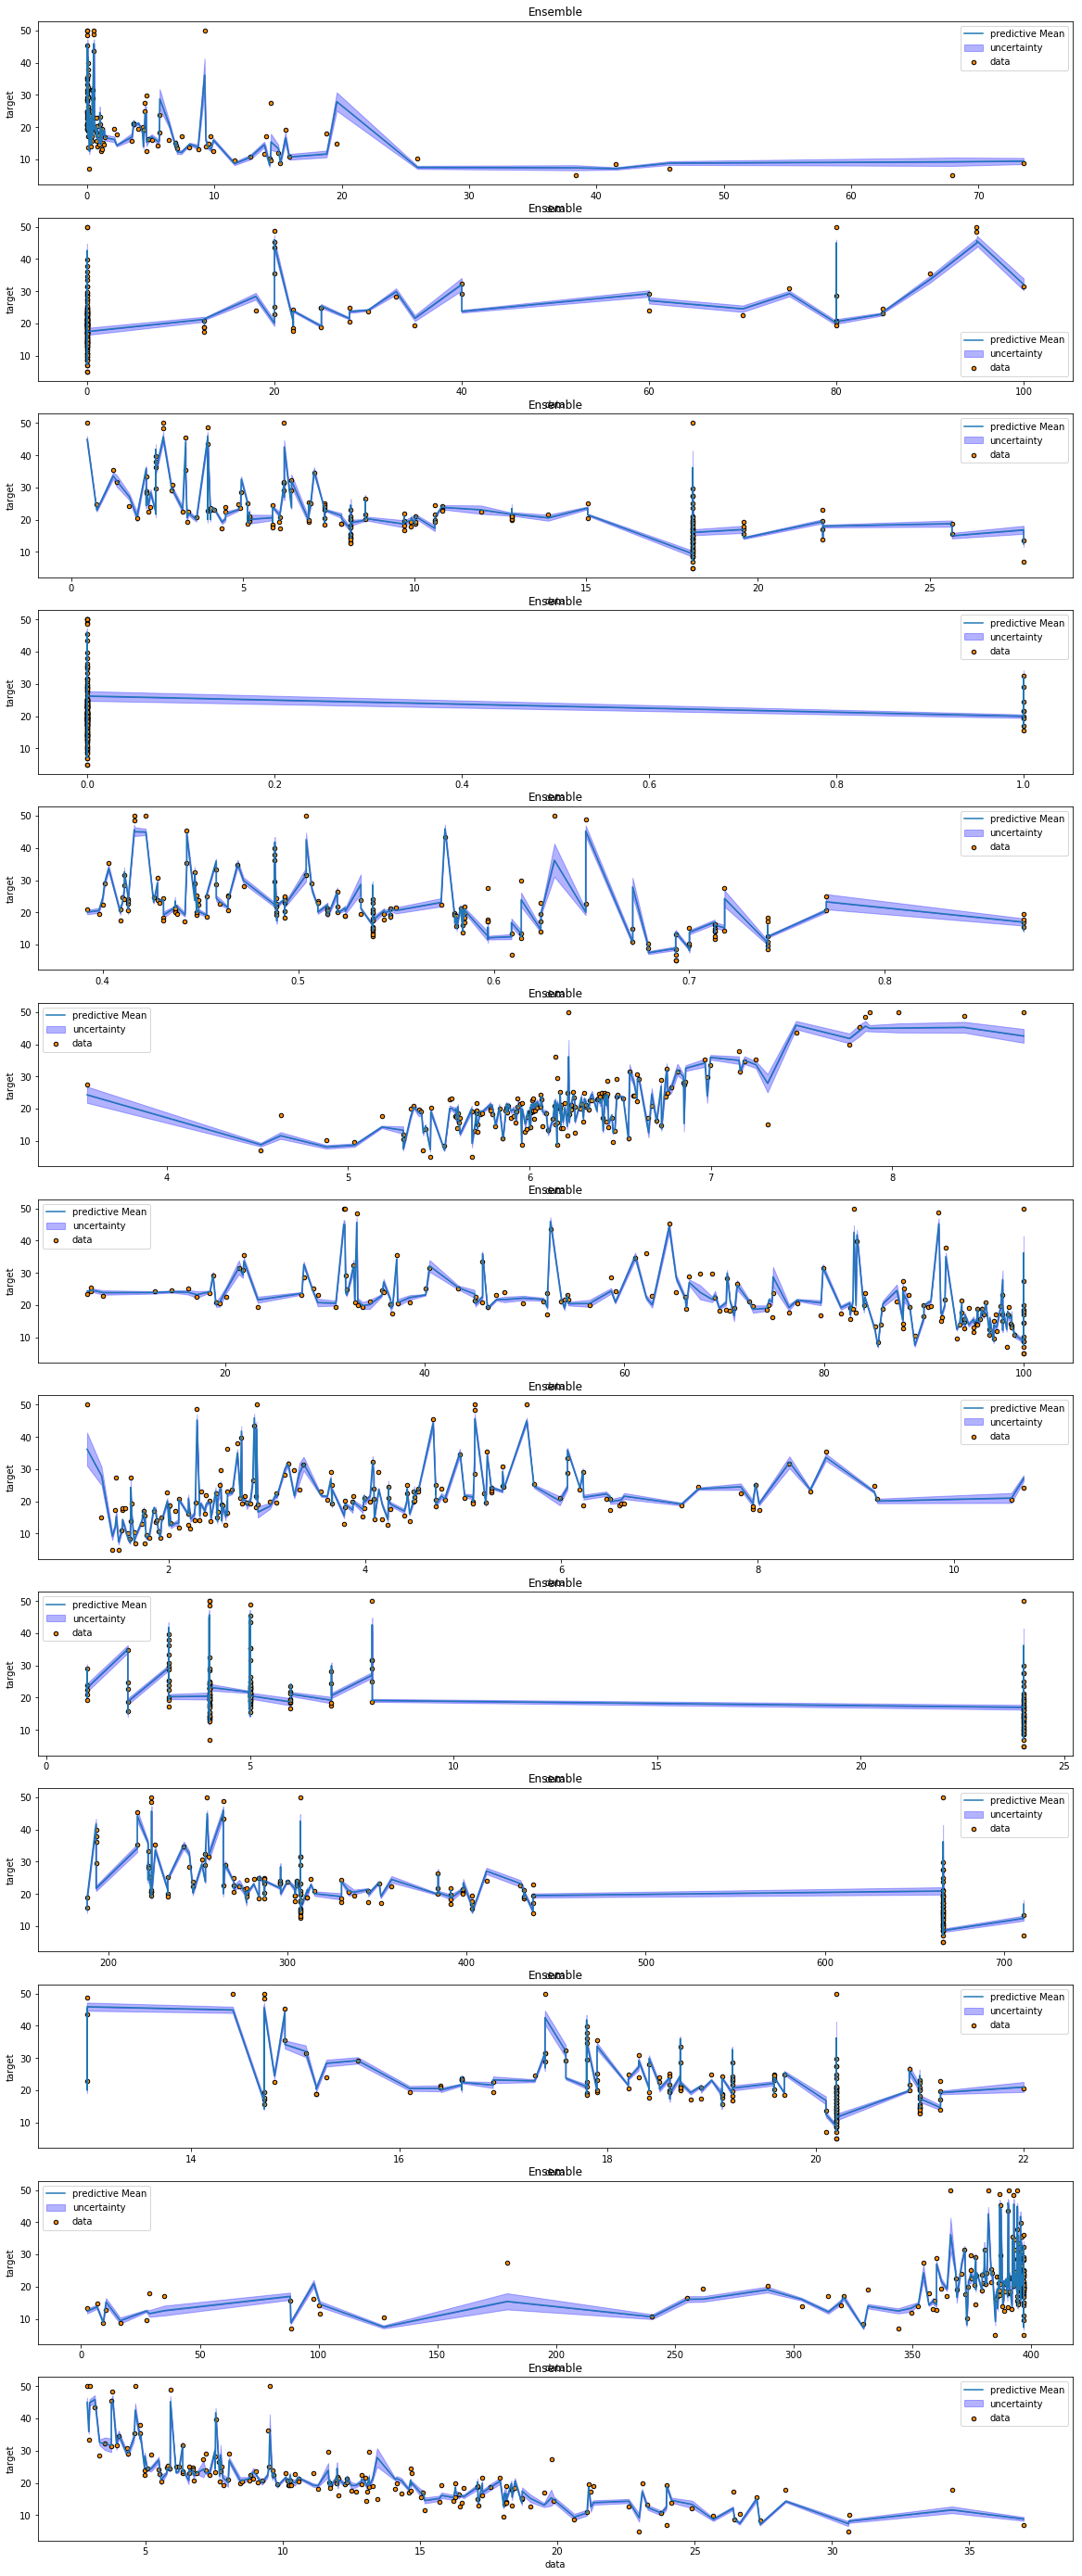

In [91]:
treeEnsemble = ensemble.RegressionEnsemble(10,RandomForestRegressor)
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test)

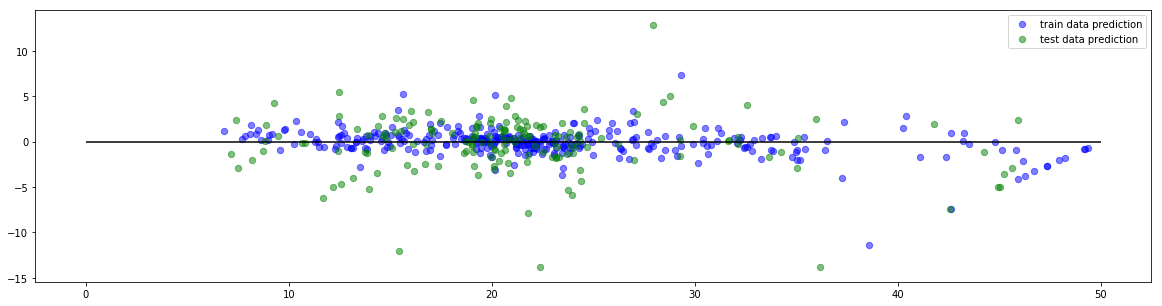

In [92]:
treeEnsemble.plot_residuals(X_train,y_train,X_test,y_test)

In [93]:
treeEnsemble.self_evaluate(X_test,y_test)

{'NLPD': -9.278219624699236,
 'correlation between error and variance': 0.539708953156666,
 'coverage probability': 0.23952095808383234,
 'error normalcy': 212.76400278106968,
 'rsme': 3.156476424616803}

## Subspace Ensemble

obviously this one is not useable in the other scenarios, since we cannot choose fewer dimensions than one. 

However, this one is very interesting as it could be used to evaluate the influence of each variable on the quality of uncertainty and the prediction.

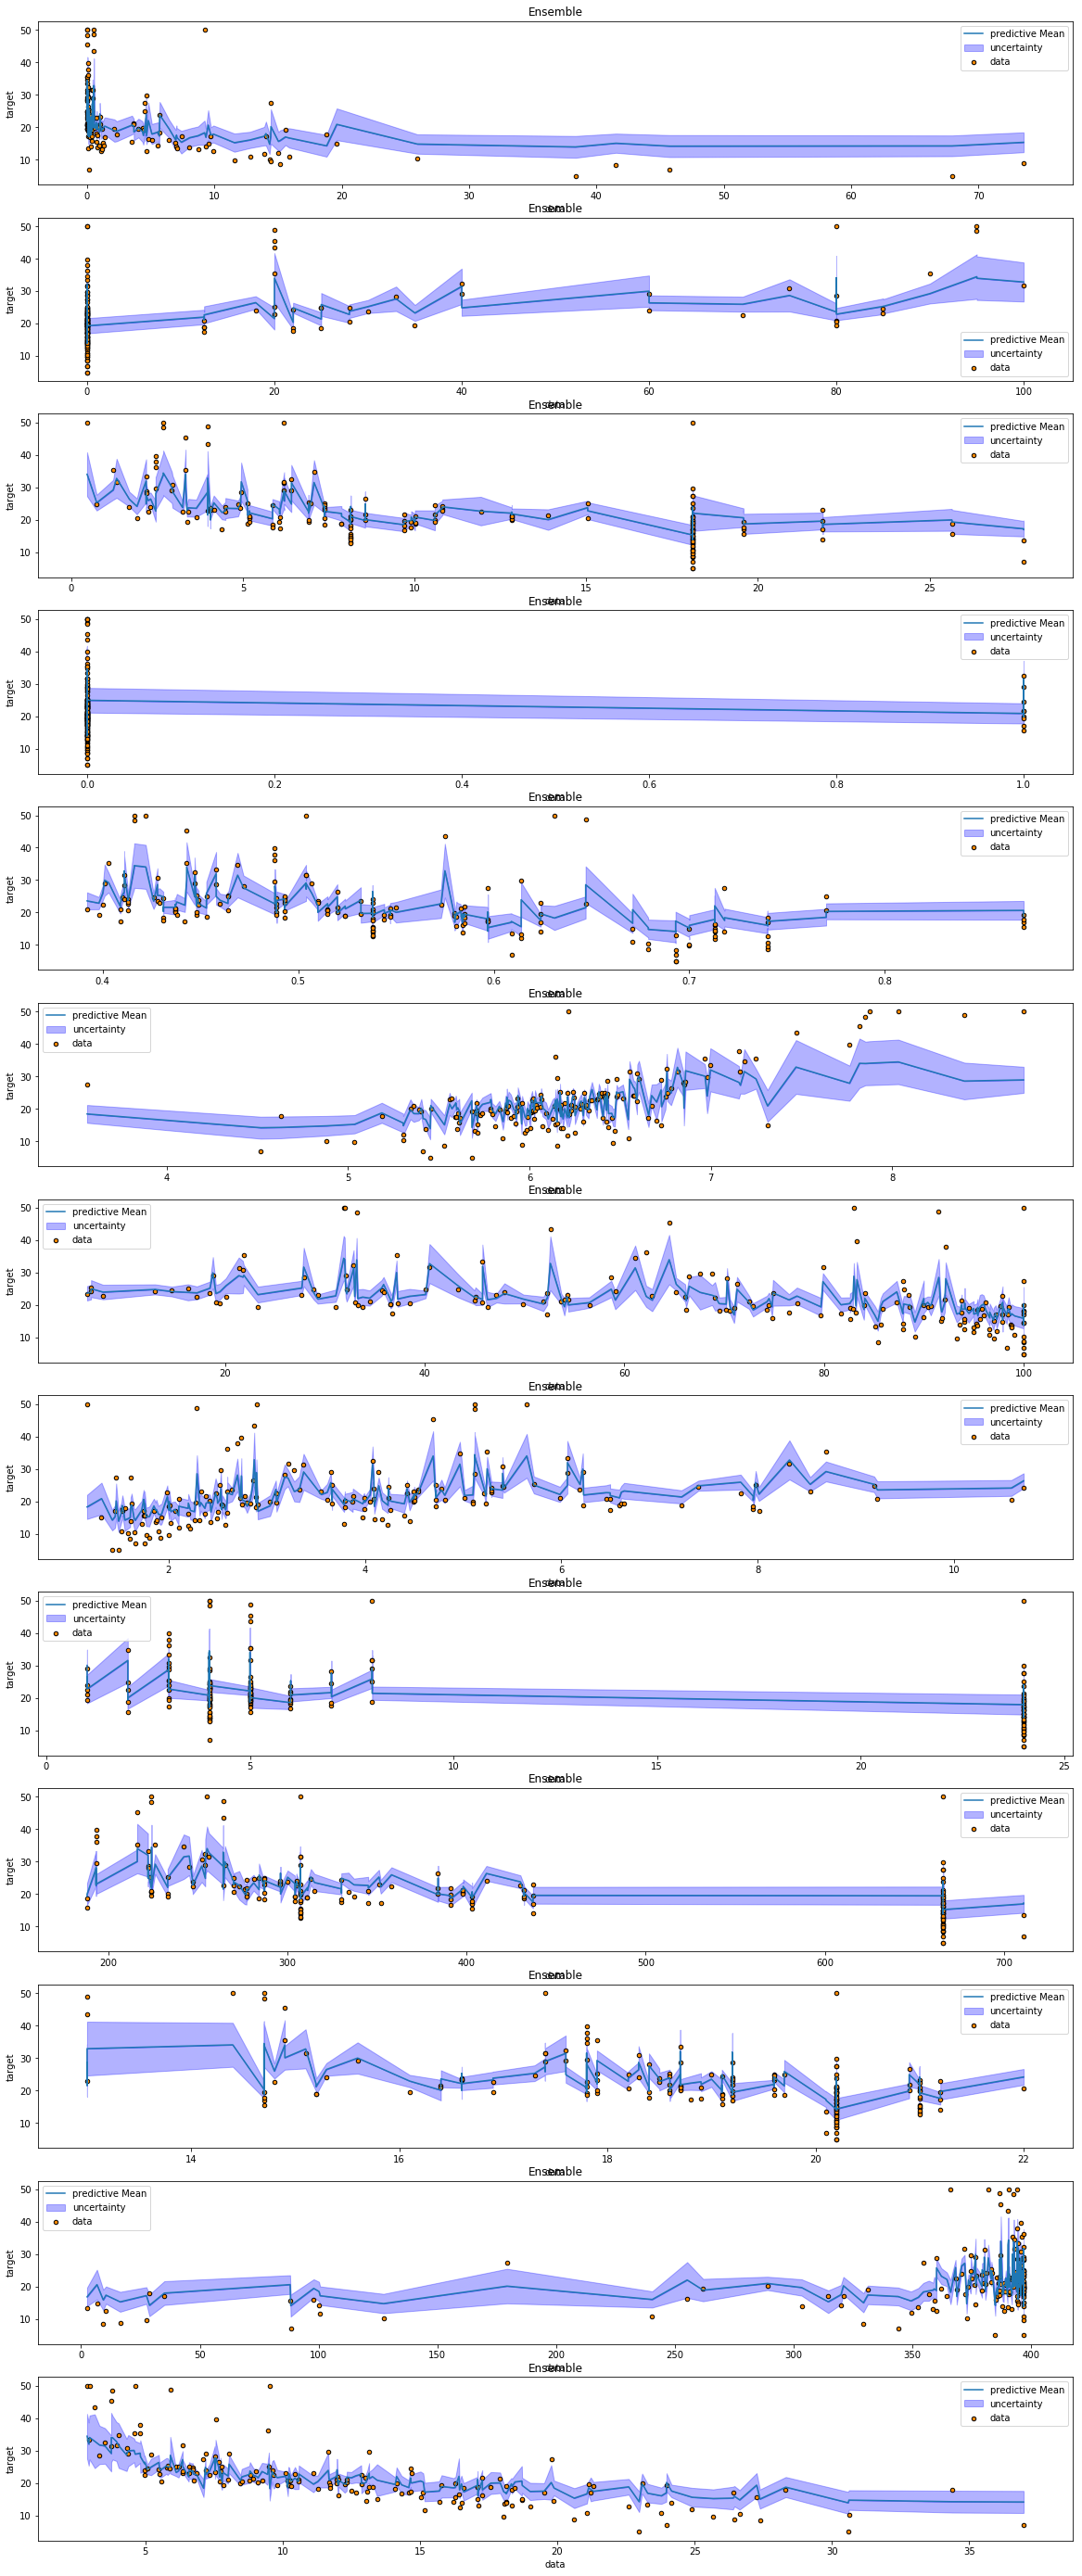

In [94]:
subspaceEnsemble = ensemble.SubspaceEnsemble(10,RandomForestRegressor,num_drop_dimensions=2)
subspaceEnsemble.fit(X_train,y_train)
y_hat,std  = subspaceEnsemble.predict(X_test,std=True)
subspaceEnsemble.mutli_dimenstional_scatterplot(X_test,y_test)

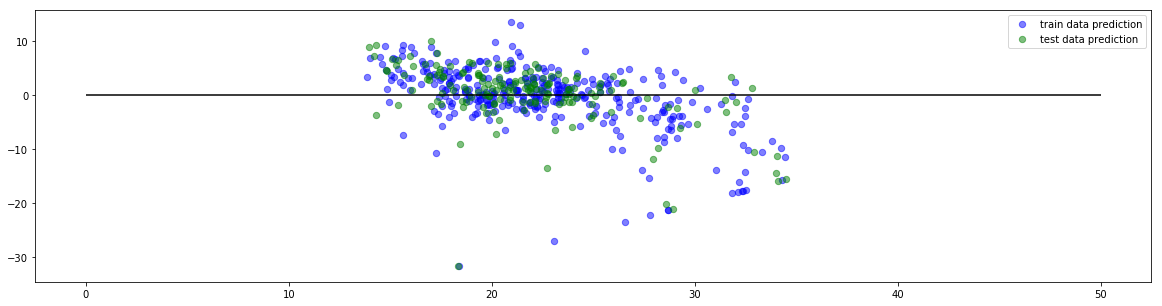

In [95]:
subspaceEnsemble.plot_residuals(X_train,y_train,X_test,y_test)

In [96]:
subspaceEnsemble.self_evaluate(X_test,y_test)

{'NLPD': -8.75270410916318,
 'correlation between error and variance': 0.32834126547122783,
 'coverage probability': 0.49700598802395207,
 'error normalcy': 267.24106503456596,
 'rsme': 5.568482667797116}

## Mixed Ensemble

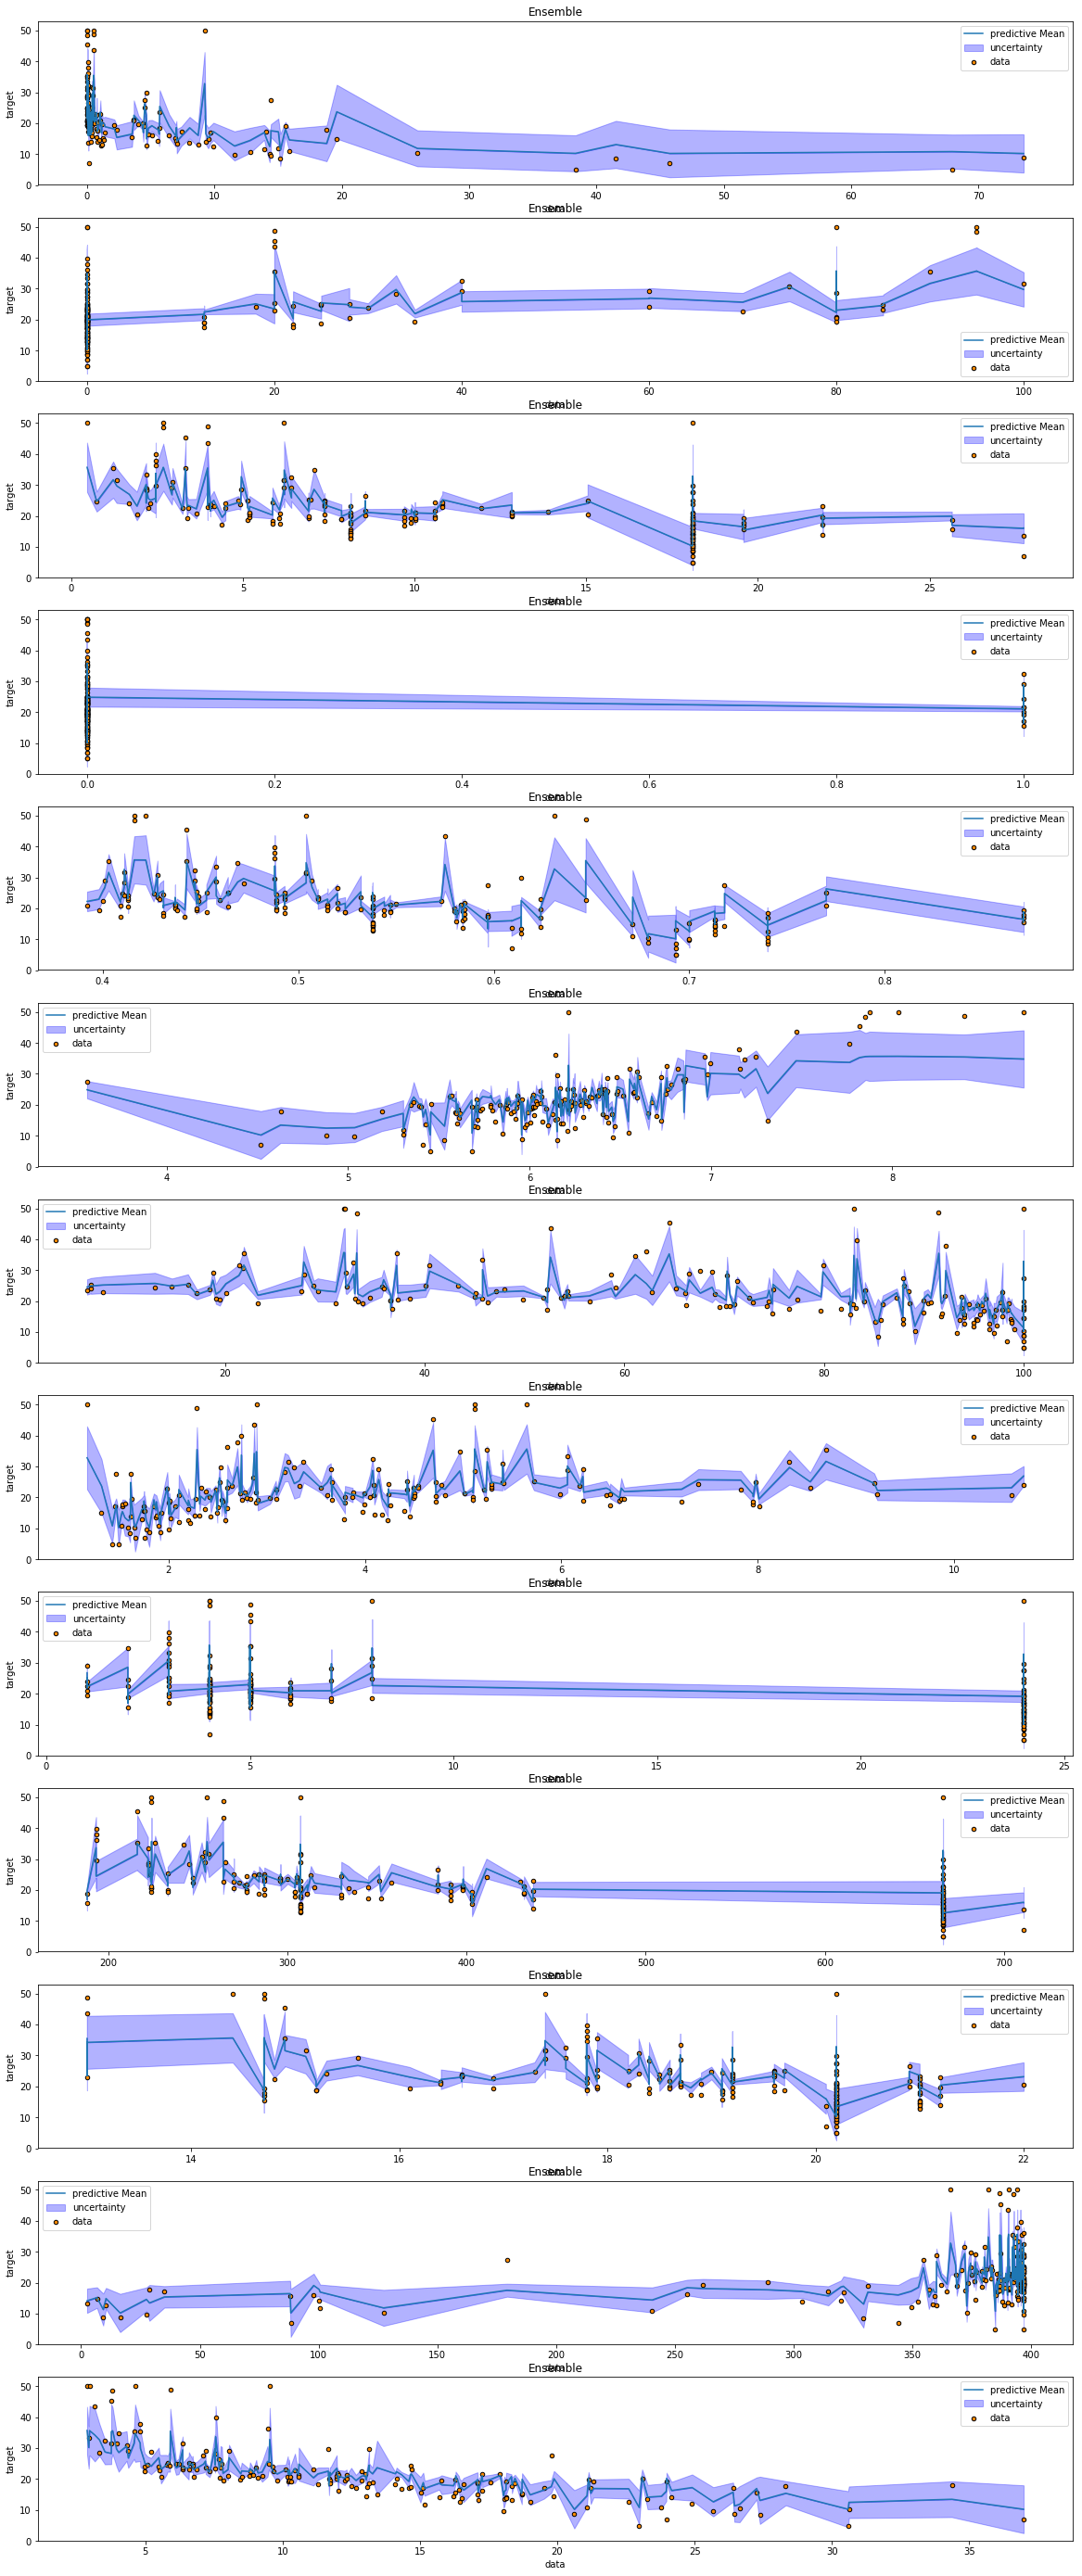

In [97]:
mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            #LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=1000),
                                                           SVR(),
                                                           RandomForestRegressor()])
mixed_ensemble.fit(X_train,y_train)
y_hat,std  = mixed_ensemble.predict(X_test,std=True)
mixed_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

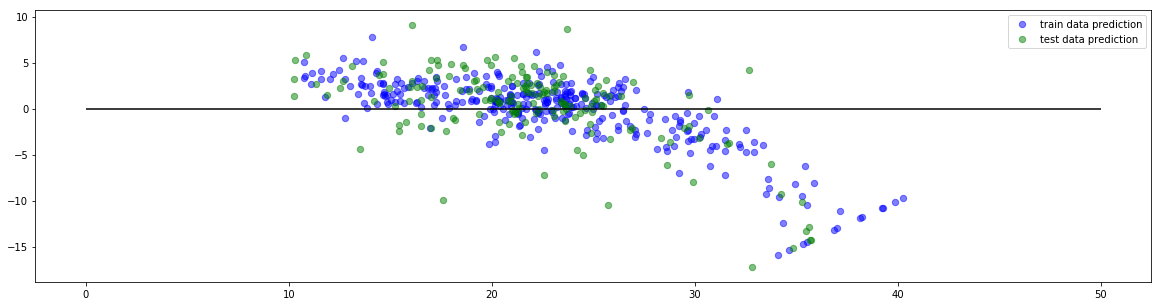

In [98]:
mixed_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [99]:
mixed_ensemble.self_evaluate(X_test,y_test)

{'NLPD': -5.235378532092934,
 'correlation between error and variance': 0.6056965638136025,
 'coverage probability': 0.6526946107784432,
 'error normalcy': 171.42338543452348,
 'rsme': 4.319866705140841}

## Bootstrap

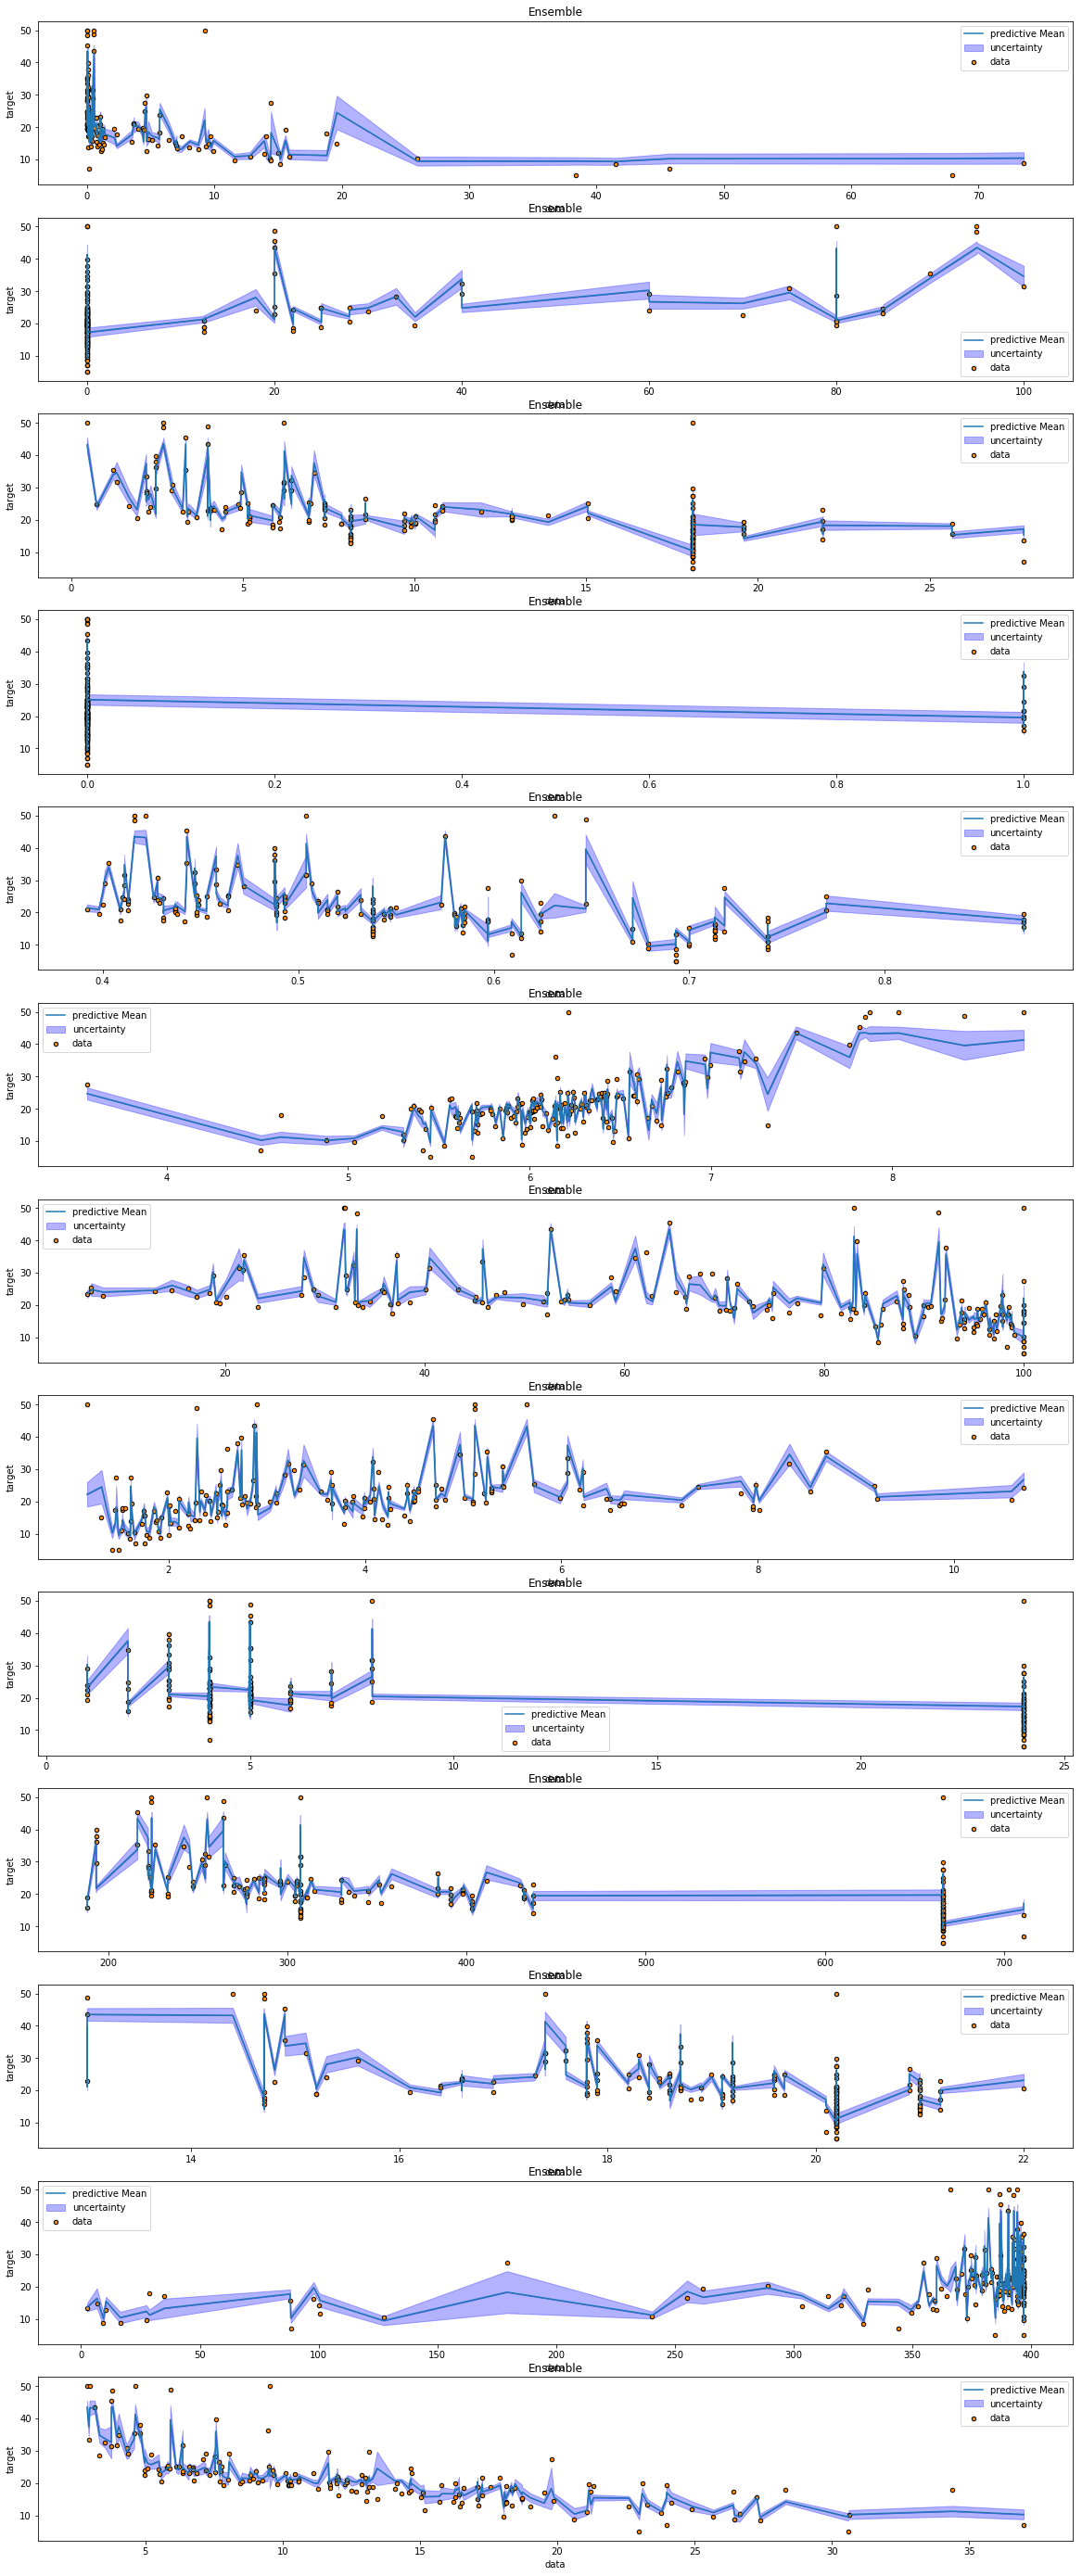

In [100]:
bootstrap_ensemble = ensemble.BootstrapEnsemble(model_type=RandomForestRegressor)


bootstrap_ensemble.fit(X_train,y_train)
y_hat,std  = bootstrap_ensemble.predict(X_test,std=True)
bootstrap_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

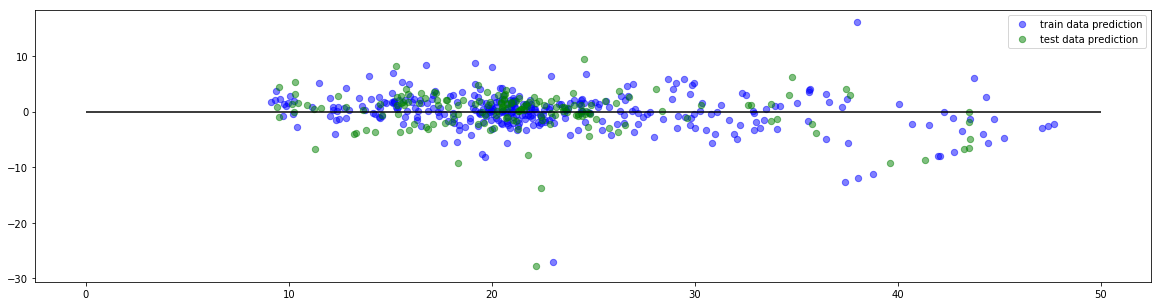

In [101]:
bootstrap_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [102]:
bootstrap_ensemble.self_evaluate(X_test,y_test)

{'NLPD': -7.247301325563257,
 'correlation between error and variance': 0.295176720663788,
 'coverage probability': 0.437125748502994,
 'error normalcy': 336.99286545847656,
 'rsme': 3.739218543675305}

## Different Data Shuffling

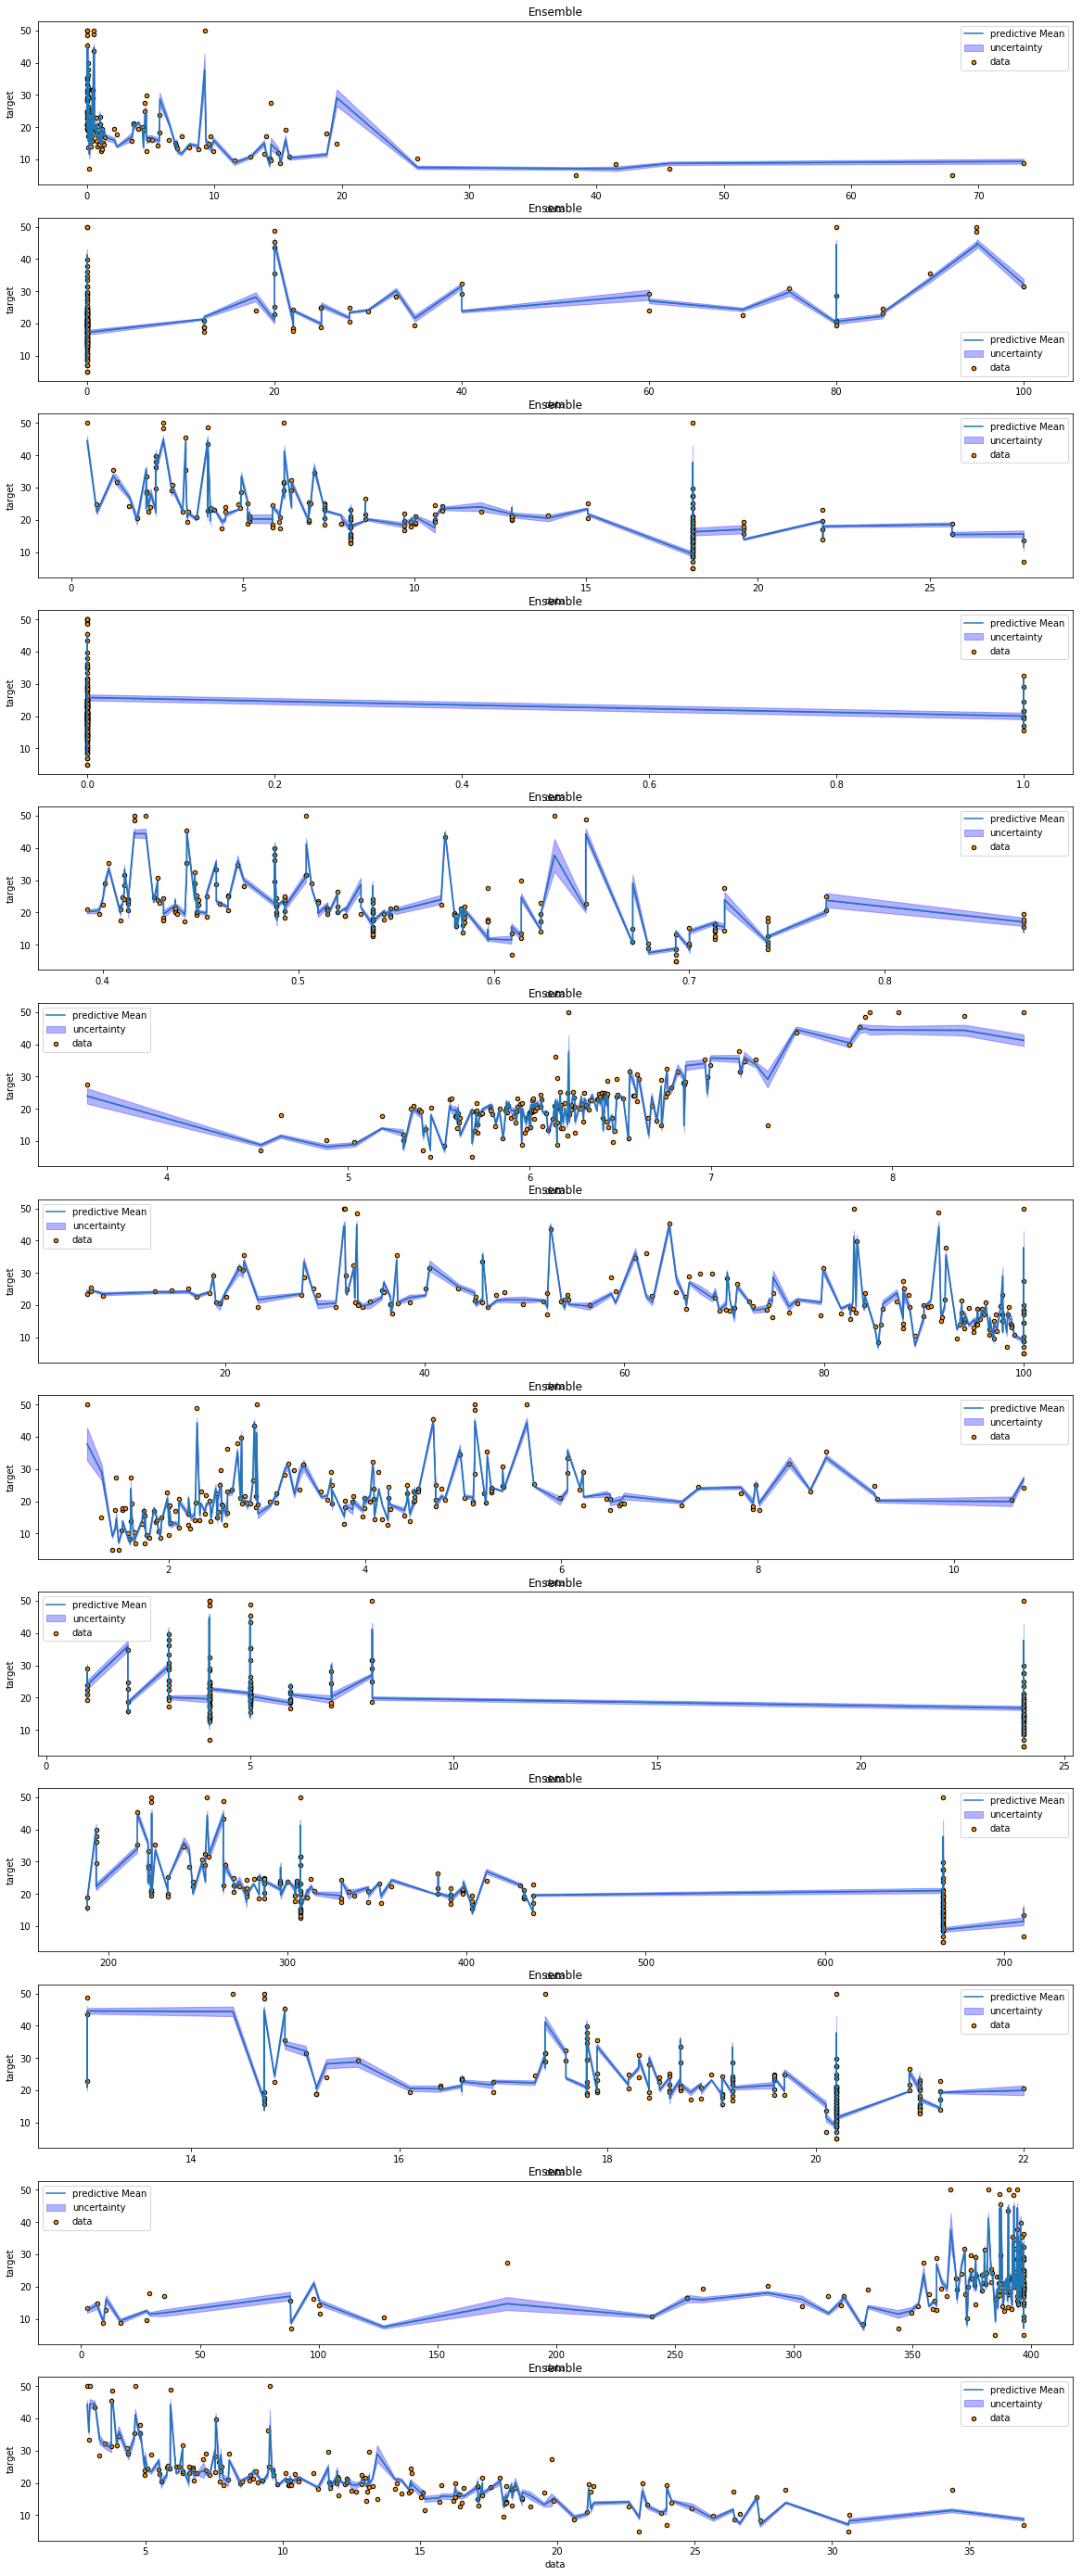

In [103]:
shuffle_ensemble = ensemble.ShuffleEnsemble(model_type=RandomForestRegressor)
shuffle_ensemble.fit(X_train,y_train)
y_hat,std  = shuffle_ensemble.predict(X_test,std=True)
shuffle_ensemble.mutli_dimenstional_scatterplot(X_test,y_test)

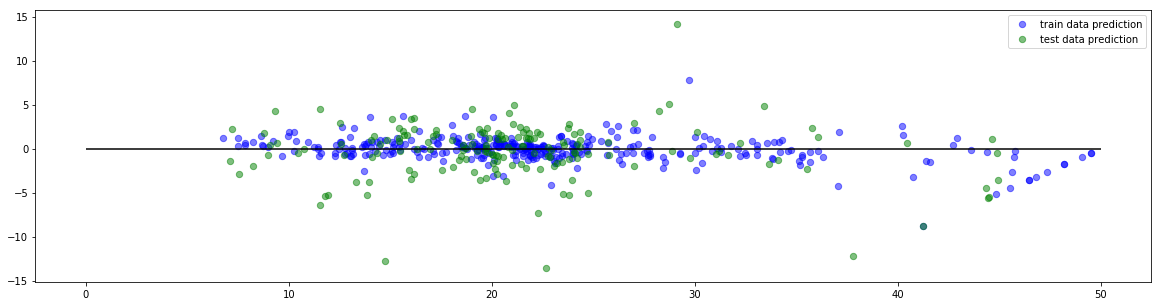

In [104]:
shuffle_ensemble.plot_residuals(X_train,y_train,X_test,y_test)

In [105]:
shuffle_ensemble.self_evaluate(X_test,y_test)

{'NLPD': -9.995335673471988,
 'correlation between error and variance': 0.505527103253598,
 'coverage probability': 0.2634730538922156,
 'error normalcy': 208.8998525588962,
 'rsme': 3.200370225589271}